In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("updated_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  object 
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
 10  filename            44424 non-null  object 
 11  link                44424 non-null  object 
 12  ratings             44424 non-null  int64  
 13  review              44424 non-null  object 
 14  Month               44424 non-null  object 
 15  Price (USD)         44424 non-null  int64  
dtypes: f

In [4]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
0,15970.jpg,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"High quality fabric, very satisfied. for every...",February,37
1,39386.jpg,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Exceeded expectations, love the fit! and I'm v...",October,104
2,59263.jpg,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy. Would rec...",September,32
3,21379.jpg,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"High quality fabric, very satisfied. for casua...",May,41
4,53759.jpg,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,http://assets.myntassets.com/v1/images/style/p...,2,"Poor material, doesn't last long. for special ...",January,11


In [5]:
df.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
filename                0
link                    0
ratings                 0
review                  0
Month                   0
Price (USD)             0
dtype: int64

In [6]:
df = df.dropna() 

In [7]:
df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
dtype: int64

In [8]:
df.describe()

,year,ratings,Price (USD)
count,44077.000000,44077.00000,44077.000000
mean,2012.782041,3.60383,36.161354
std,2.108119,1.27851,16.762888
min,2007.000000,1.00000,10.000000
25%,2011.000000,3.00000,26.000000
50%,2012.000000,4.00000,34.000000
75%,2015.000000,5.00000,43.000000
max,2019.000000,5.00000,150.000000


In [10]:
for column in ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage']:
    print(f"\nUnique values in {column}:")
    print(df[column].value_counts())


Unique values in gender:
gender
Men       22109
Women     18357
Unisex     2126
Boys        830
Girls       655
Name: count, dtype: int64

Unique values in masterCategory:
masterCategory
Apparel           21366
Accessories       11244
Footwear           9197
Personal Care      2139
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64

Unique values in subCategory:
subCategory
Topwear                     15387
Shoes                        7323
Bags                         3053
Bottomwear                   2686
Watches                      2542
Innerwear                    1806
Jewellery                    1079
Eyewear                      1073
Fragrance                    1001
Sandal                        961
Wallets                       925
Flip Flops                    913
Belts                         811
Socks                         698
Dress                         478
Loungewear and Nightwear      464
Saree                         4

In [11]:
df.usage.value_counts()

usage
Casual          34397
Sports           4004
Ethnic           3208
Formal           2345
Smart Casual       67
Party              29
Travel             26
Home                1
Name: count, dtype: int64

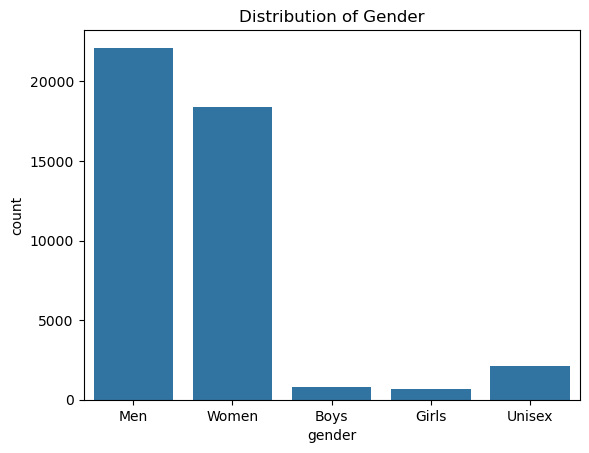

In [13]:
# Gender distribution
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')
plt.show()

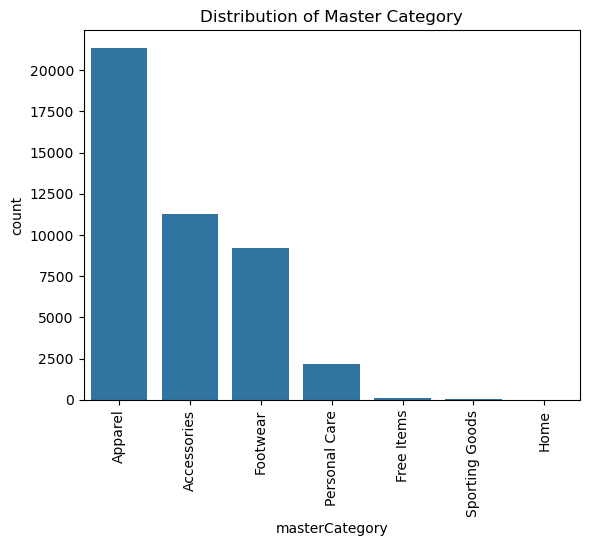

In [14]:
# Master category distribution
sns.countplot(x='masterCategory', data=df)
plt.title('Distribution of Master Category')
plt.xticks(rotation=90)
plt.show()

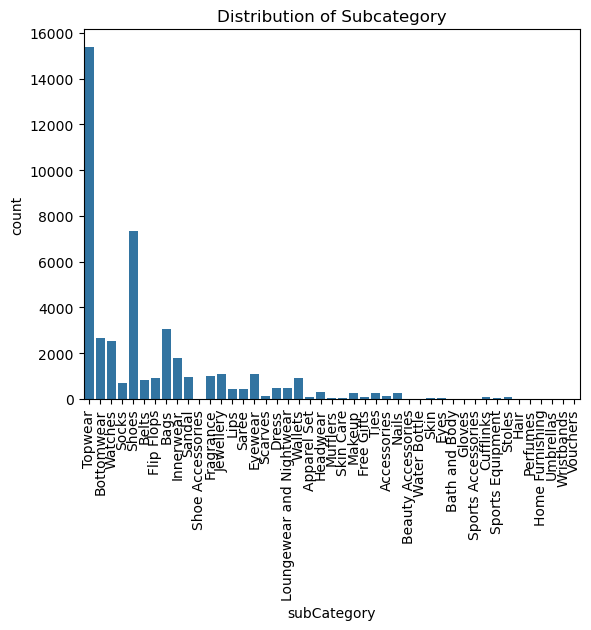

In [26]:
# Subcategory distribution
sns.countplot(x='subCategory', data=df)
plt.title('Distribution of Subcategory')
plt.xticks(rotation=90)
plt.show()

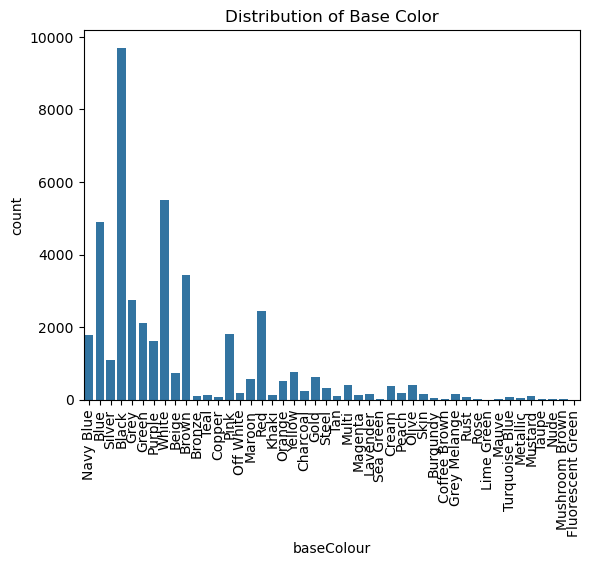

In [28]:

sns.countplot(x='baseColour', data=df)
plt.title('Distribution of Base Color')
plt.xticks(rotation=90)
plt.show()

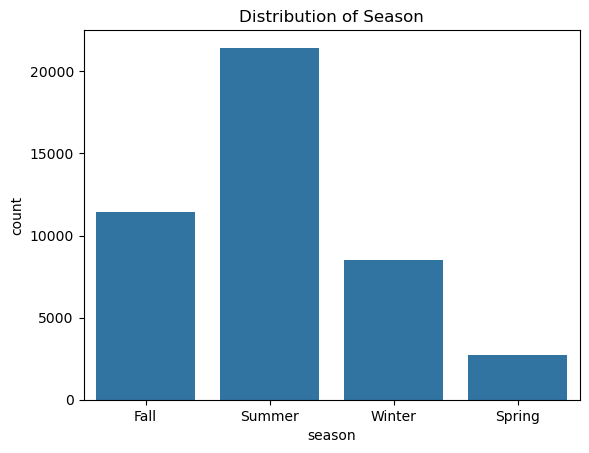

In [30]:
# Season distribution
sns.countplot(x='season', data=df)
plt.title('Distribution of Season')
plt.show()

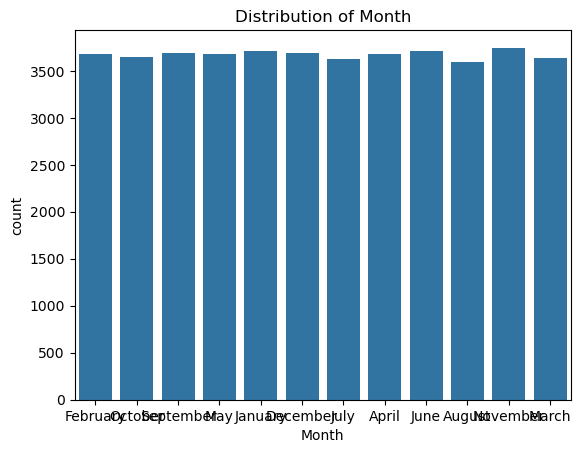

In [32]:
# Month distribution
sns.countplot(x='Month', data=df)
plt.title('Distribution of Month')
plt.show()

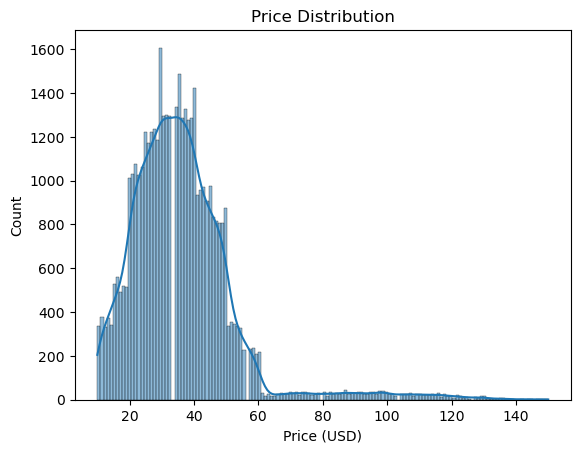

In [34]:
# Price distribution
sns.histplot(df['Price (USD)'], kde=True)
plt.title('Price Distribution')
plt.show()

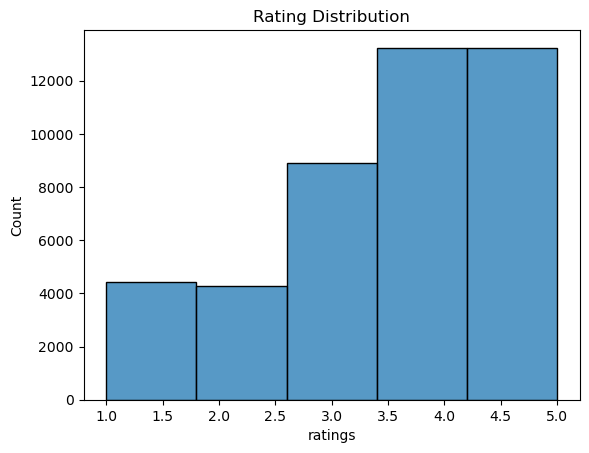

In [36]:
# Ratings distribution
sns.histplot(df['ratings'], bins=5)
plt.title('Rating Distribution')
plt.show()


In [38]:
# 4. Bivariate Analysis

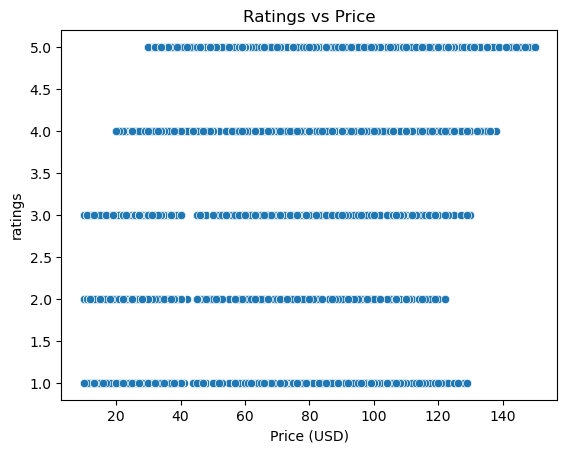

In [40]:
sns.scatterplot(x='Price (USD)', y='ratings', data=df)
plt.title('Ratings vs Price')
plt.show()


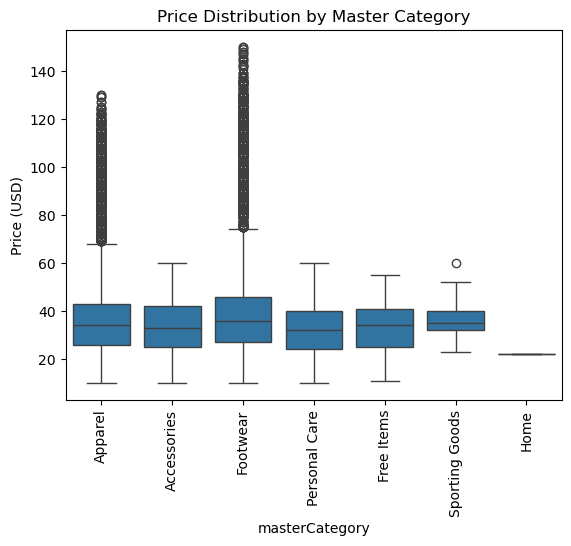

In [42]:
# Price vs MasterCategory
sns.boxplot(x='masterCategory', y='Price (USD)', data=df)
plt.title('Price Distribution by Master Category')
plt.xticks(rotation=90)
plt.show()

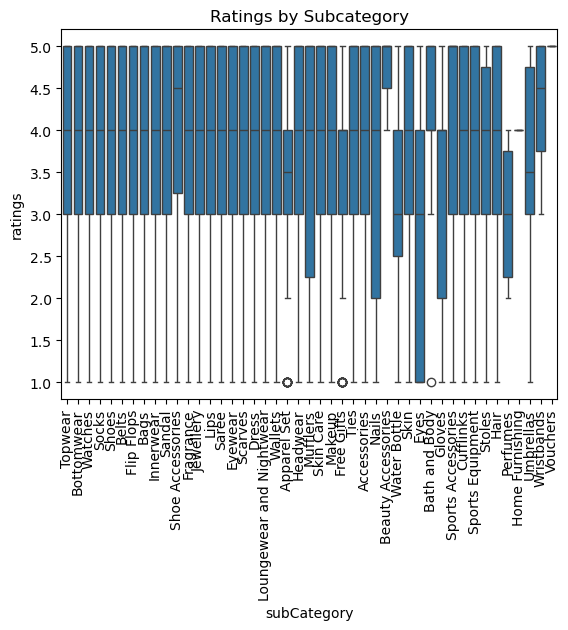

In [44]:
# Ratings vs Subcategory
sns.boxplot(x='subCategory', y='ratings', data=df)
plt.title('Ratings by Subcategory')
plt.xticks(rotation=90)
plt.show()

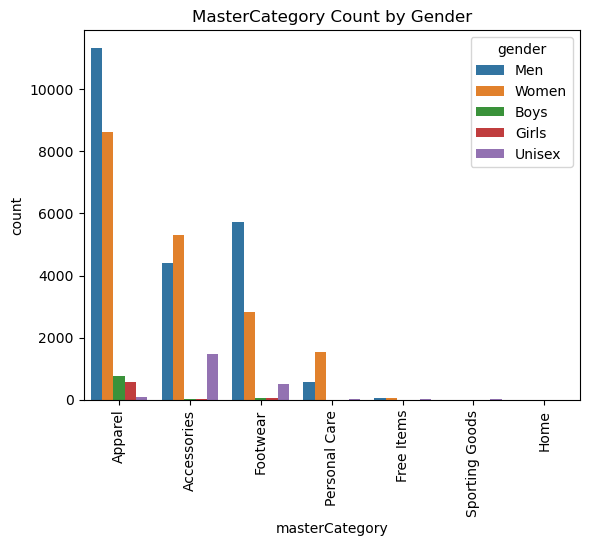

In [46]:
# Count of MasterCategory by Gender
sns.countplot(x='masterCategory', hue='gender', data=df)
plt.title('MasterCategory Count by Gender')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Seasonal trends in purchasing behavior
sns.countplot(x='season', hue='masterCategory', data=df)
plt.title('Item Preferences by Season')
plt.show()

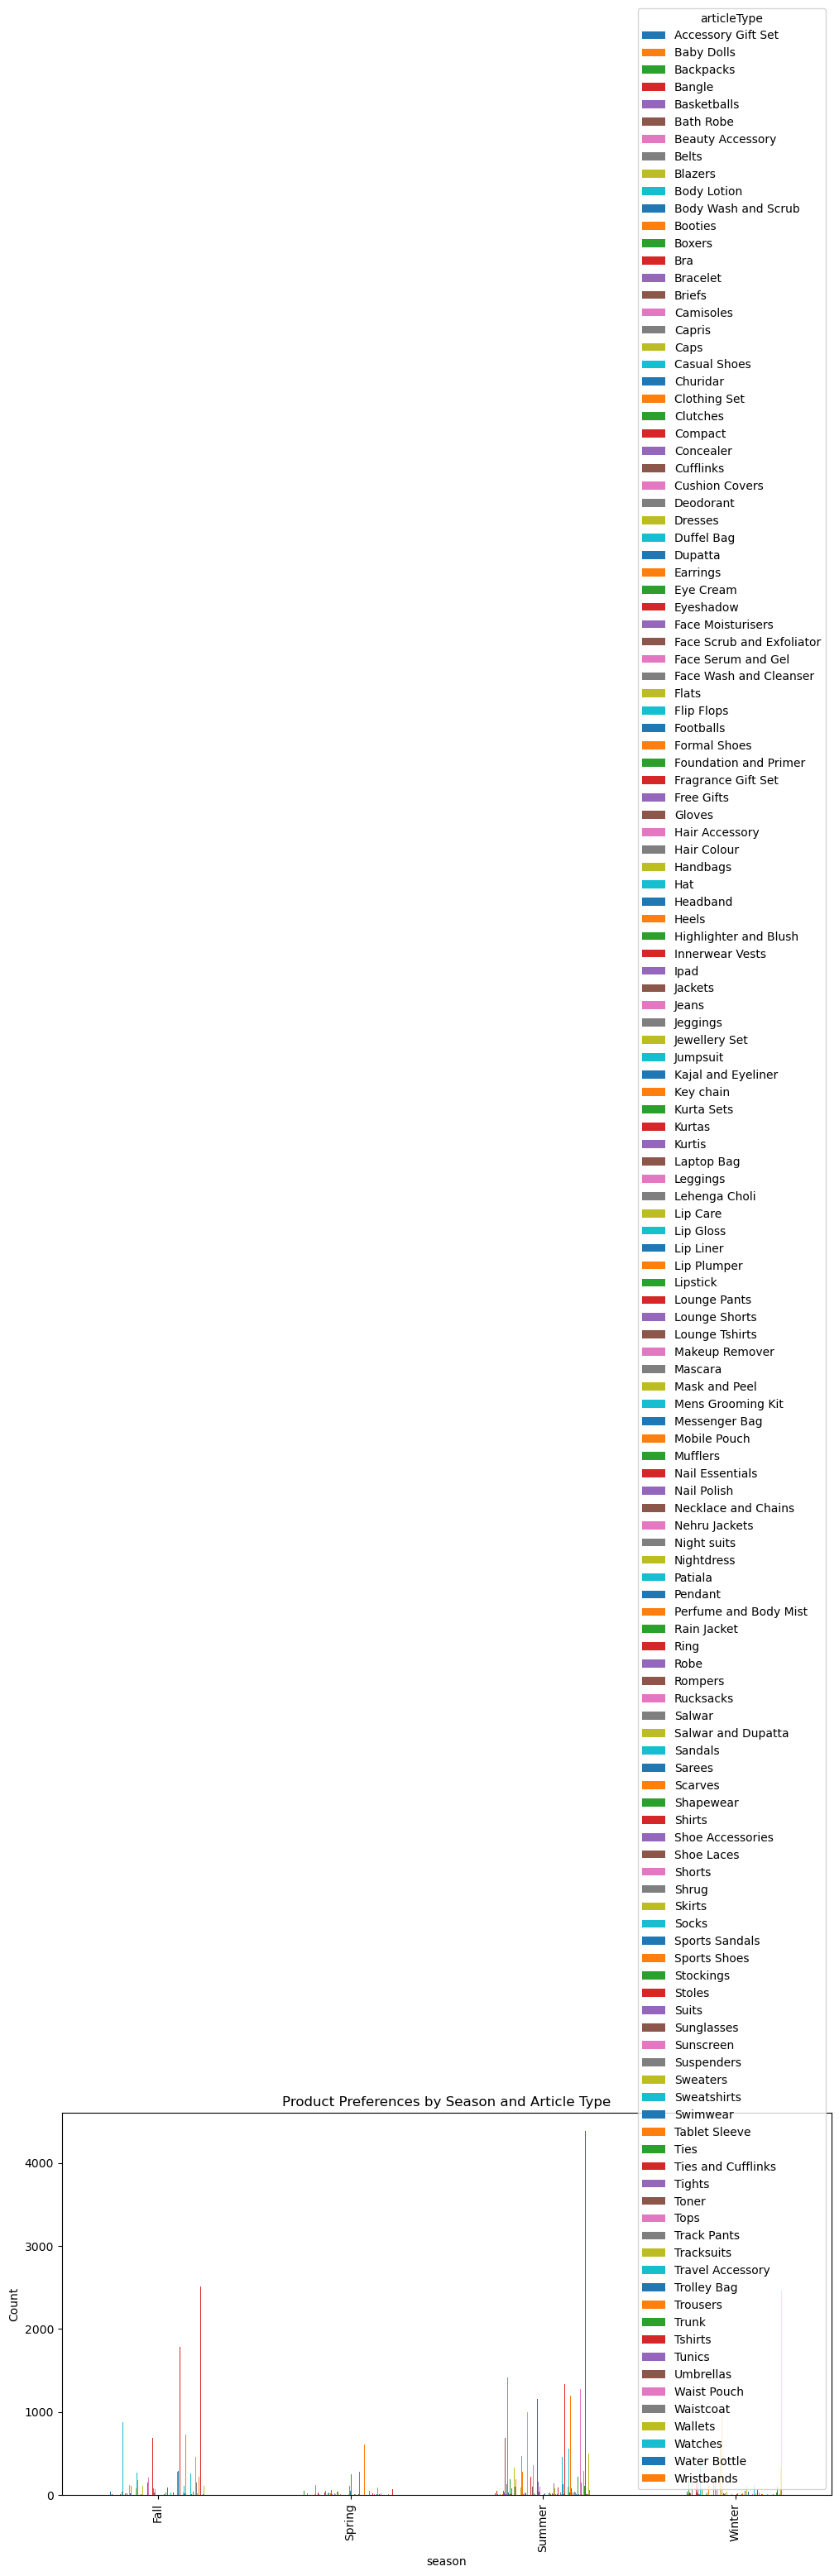

In [50]:
# Crosstab as a grouped bar chart (not stacked)
crosstab = pd.crosstab(df['season'], df['articleType'])
crosstab.plot(kind='bar', figsize=(12, 6))  # Grouped bar chart
plt.title('Product Preferences by Season and Article Type')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()


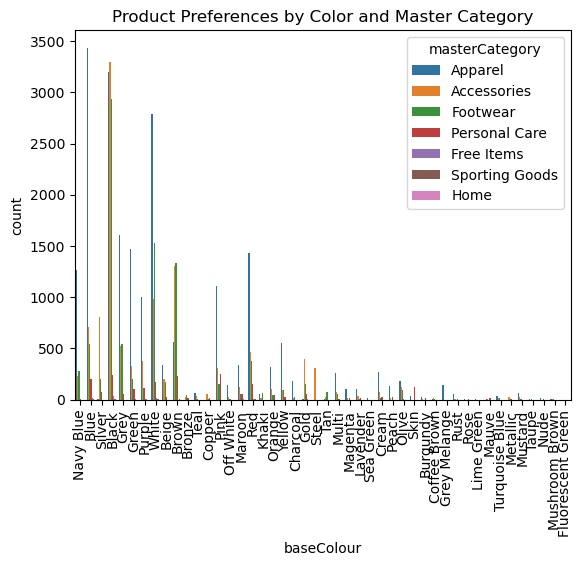

In [52]:
## Analysis of Product Preferences by Base Colour
sns.countplot(x='baseColour', hue='masterCategory', data=df)
plt.title('Product Preferences by Color and Master Category')
plt.xticks(rotation=90)
plt.show()

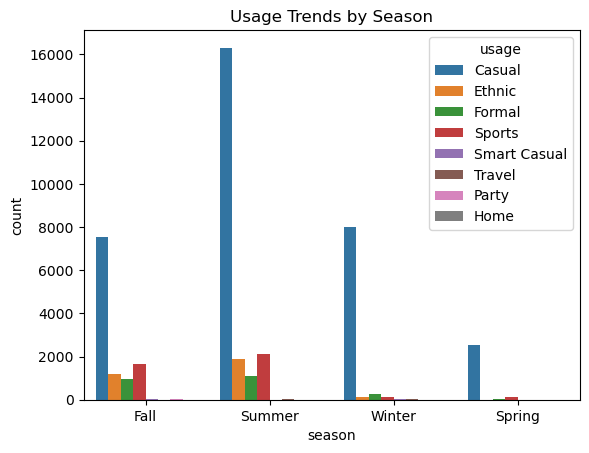

In [54]:
# #Trends in usage across different seasons
sns.countplot(x='season', hue='usage', data=df)
plt.title('Usage Trends by Season')
plt.show()

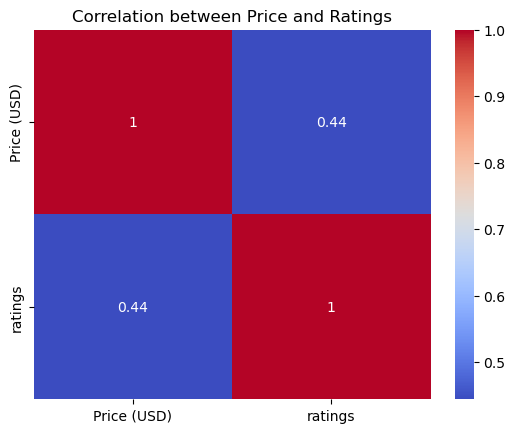

In [56]:
# Correlation between Price and Ratings
corr = df[['Price (USD)', 'ratings']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Price and Ratings')
plt.show()

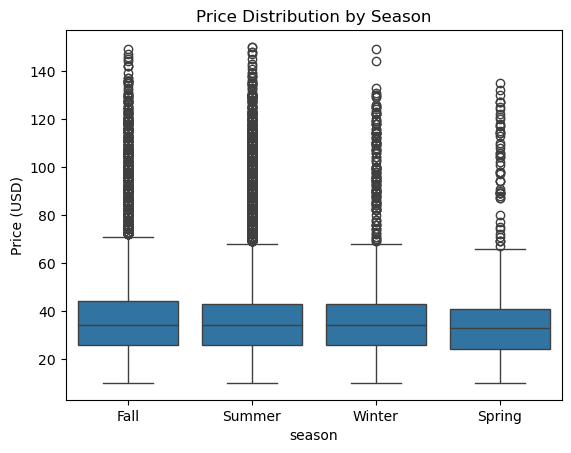

In [58]:
# Price and Ratings trends across Seasons
sns.boxplot(x='season', y='Price (USD)', data=df)
plt.title('Price Distribution by Season')
plt.show()

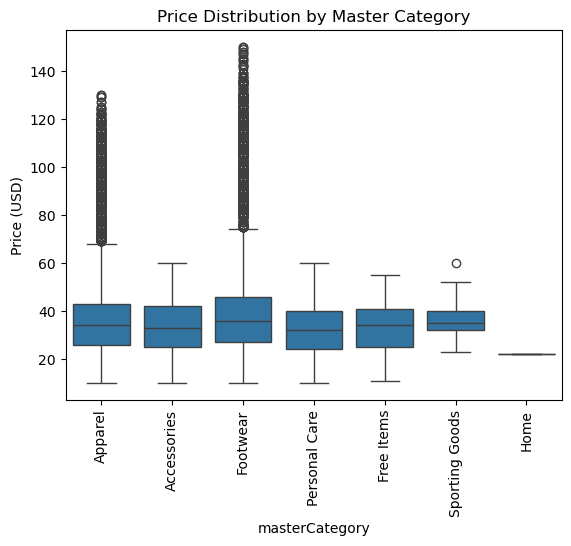

In [60]:
# Trends in Price based on master category
sns.boxplot(x='masterCategory', y='Price (USD)', data=df)
plt.title('Price Distribution by Master Category')
plt.xticks(rotation=90)
plt.show()

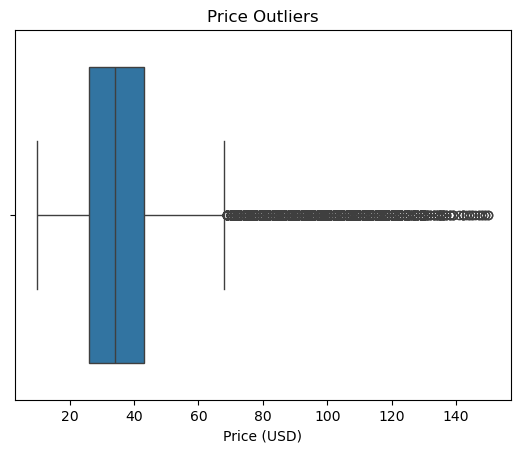

In [62]:
# Boxplot for Price to detect outliers
sns.boxplot(x=df['Price (USD)'])
plt.title('Price Outliers')
plt.show()



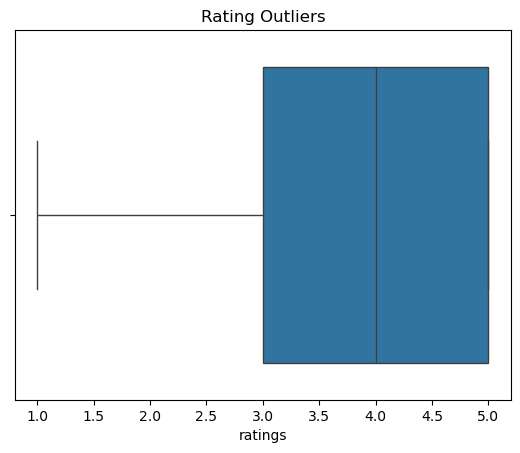

In [64]:
# Boxplot for Rating
sns.boxplot(x=df['ratings'])
plt.title('Rating Outliers')
plt.show()

In [66]:
# Remove outliers based on price (keep only prices within 3 standard deviations)
df_cleaned = df[(df['Price (USD)'] <= df['Price (USD)'].mean() + 3 * df['Price (USD)'].std())]

In [70]:
# Standardizing the numeric features for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Price (USD)', 'ratings']])

In [72]:
# PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

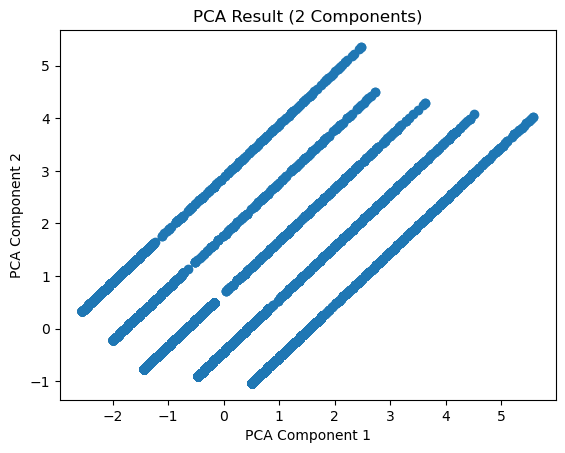

In [74]:
# Scatter plot of the PCA components
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.title('PCA Result (2 Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [76]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df_scaled)

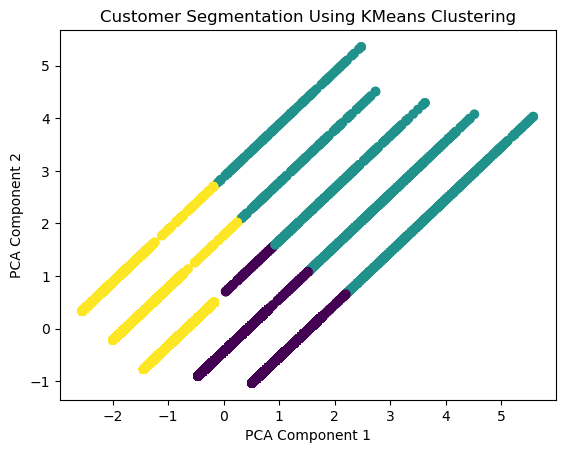

In [78]:
#clusters using PCA components
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Customer Segmentation Using KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

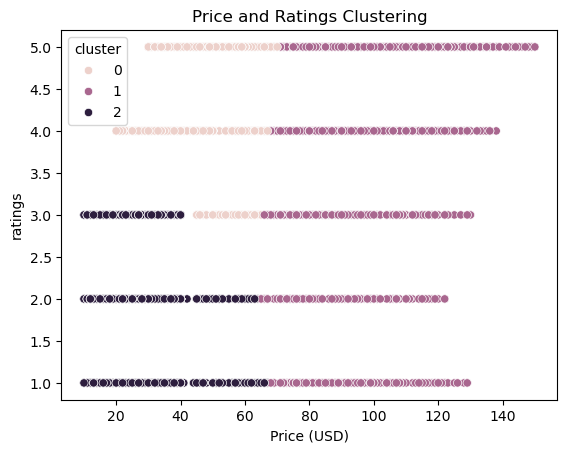

In [86]:
# Purchase trends by Price and Ratings clusters
sns.scatterplot(x='Price (USD)', y='ratings', hue='cluster', data=df)
plt.title('Price and Ratings Clustering')
plt.show()
